In [1]:
from astropy.table import Table, Column
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm
sys.path.insert(0, '/home/reza/erq/')
from erqml import *
import sys
sys.path.insert(0, '/home/reza/erq')
from scipy import interpolate
# import pyfits
from numpy import *
import math
import scipy.ndimage
from scipy import interpolate
from numpy import nanmean
from numpy import nanmedian
from readSDSSspectrafast import *
import matplotlib.pylab as plt
import numpy as np
from erqml import *
from scipy import ndimage
from line_db import line_db
import os
# Reading data
# smp=Table.read('/home/reza/erq/sampling/org_sample2.fits')
smp=Table.read('/home/reza/erq/sampling/LM_sample.fits')
W3_0=smp['ABw3']
iW3_0 = smp['i-w3']
kt80_0= smp['kurt80_gf']
rew_0 = smp['rew_gf']
rew_0  = np.log10(rew_0)
frat_0 = smp['frat_nv/civ']
fwhm_0 = smp['fwhm_gf']
rw3_0=smp['r-w3']
rz_0=smp['r-z']
iz_0 = iW3_0 - rw3_0 + rz_0
Lum_0 = smp['Lum']
z_dr12=smp['z_dr12']
nqsos=len(iW3_0)
# smp.columns


/home/reza/anaconda3/lib/python3.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
#  ---------r-z sample
W3_rz= W3_0[z_dr12<=2.7]
iW3_rz = iW3_0[z_dr12<=2.7]
kt80_rz= kt80_0[z_dr12<=2.7]
rew_rz = rew_0[z_dr12<=2.7]
frat_rz = frat_0[z_dr12<=2.7]
fwhm_rz = fwhm_0[z_dr12<=2.7]
rw3_rz=rw3_0[z_dr12<=2.7]
rz_rz=rz_0[z_dr12<=2.7]
iz_rz = iW3_rz - rw3_rz + rz_rz
Lum_rz = Lum_0[z_dr12<=2.7]

In [3]:

X = np.array(list(zip(iW3_rz, rz_rz, rew_rz)))
X_sc, s, m = scale(X)


In [4]:
from sklearn import svm
from sklearn.cluster import AgglomerativeClustering
X_tr = X_sc
ERQ_rz_sc = X_tr[((iW3_rz>4.6) & (rew_rz>2))]
ERQ_rz = X[((iW3_rz>4.6) & (rew_rz>2))]

4 ward


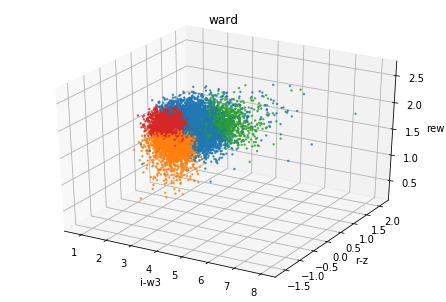

5 ward


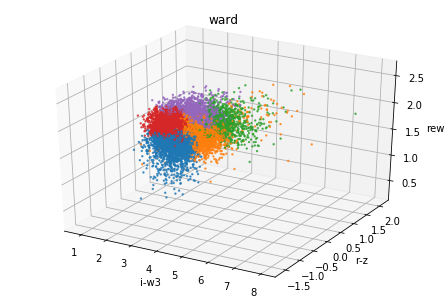

6 ward


KeyboardInterrupt: 

In [5]:
for link in ['ward', 'complete', 'average', 'single']:
    for ncl in [4,5,6,7,8]:
        print(ncl, link)
        model = AgglomerativeClustering(n_clusters=ncl, linkage=link, affinity='euclidean').fit(X_tr)
        labels = model.labels_
        colors = ['C0', 'C1', 'C2','C3', 'C4', 'C5', 'C6', 'C7', 'C8']
        color_code=[]
        for i in range(len(X_sc)):
                color_code.append(colors[labels[i]])
        fg = plt.figure()
        ax = Axes3D(fg)
        ax.scatter(X[:,0], X[:,1], X[:,2],  c=color_code, alpha=0.7, s=2)
        ax.set_xlabel('i-w3')
        ax.set_ylabel('r-z')
        ax.set_zlabel('rew')
#         plt.scatter(X[:,0], X[:,1],  c=color_code, alpha=0.7, s=2)
#         plt.scatter(ERQ_rz[:,0], ERQ_rz[:,1],  facecolor='none', edgecolor='black', 
#                     s=20)
#         plt.axvline(x=4.6, ymin=0.6)
#         plt.axhline(y=2, xmin=0.6)
        plt.title(link)
        plt.savefig('3d-rz-iw3-ncl-%d-link-%s.pdf' %(ncl, link), 
                    format='pdf', dpi=1200, bbox_inches='tight')
        plt.show()

In [ ]:
nqsos-len(rz_rz)

In [ ]:
len(ERQ_rz)